In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

In [3]:
dt = 1 / 500
N = 1000
ts = np.arange(0, dt * N, dt)

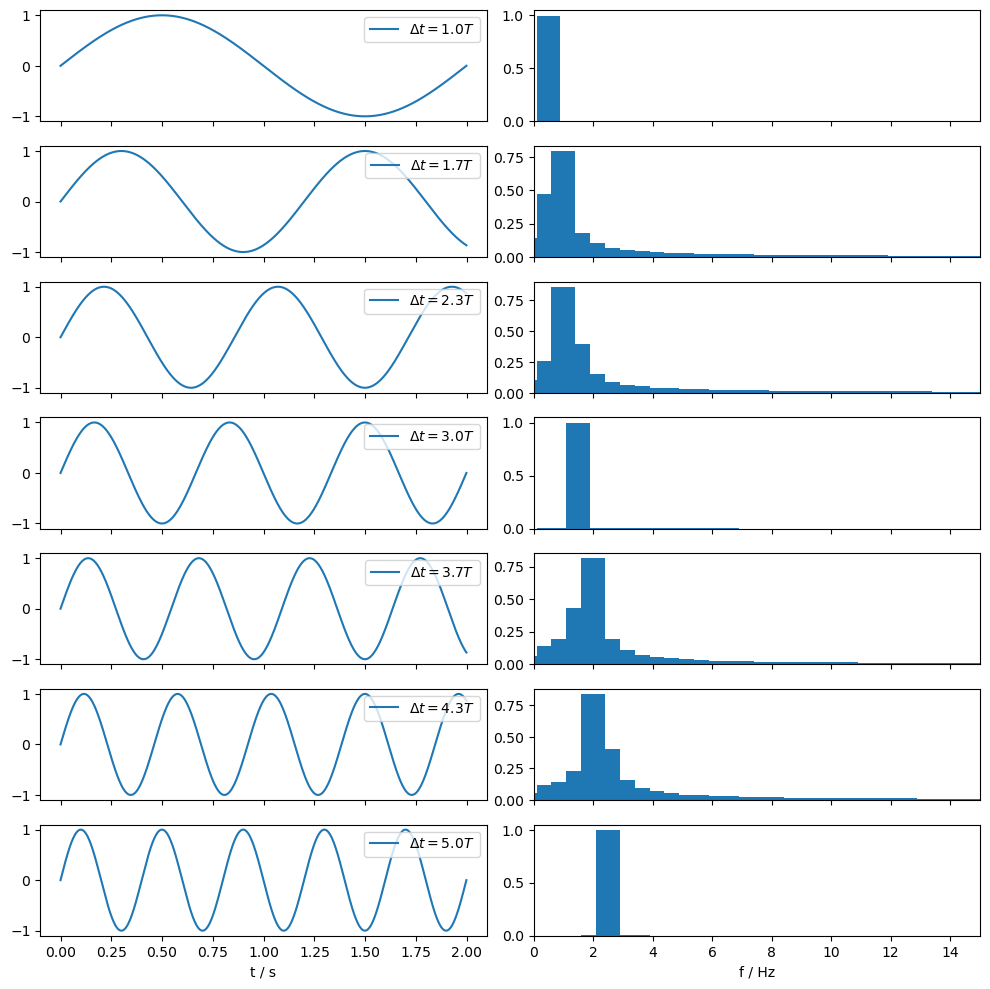

In [43]:
k = 7
ns = np.linspace(1, 5, k)

fig, axs = plt.subplots(k, 2, sharex='col', figsize=(10,10))
for i, n in enumerate(ns):
    f = n/ (np.max(ts))
    ys = np.sin(2 * np.pi * f * ts)
    axs[i][0].plot(ts, ys, label=f'$\\Delta t = {n:.2} T$')


    yfft = fft(ys)
    yfft =  2.0 / N * np.abs(yfft[0:N//2])
    yfft[0] = yfft[0] / 2
    axs[i][1].bar(fftfreq(N, d=dt)[0:N//2], yfft, )
    axs[i][1].set(xlim=[0, 15])
    axs[i][0].legend(loc=1)


axs[-1][1].set(xlabel='f / Hz')
axs[-1][0].set(xlabel='t / s')
fig.tight_layout()
fig.savefig('out/leakage')

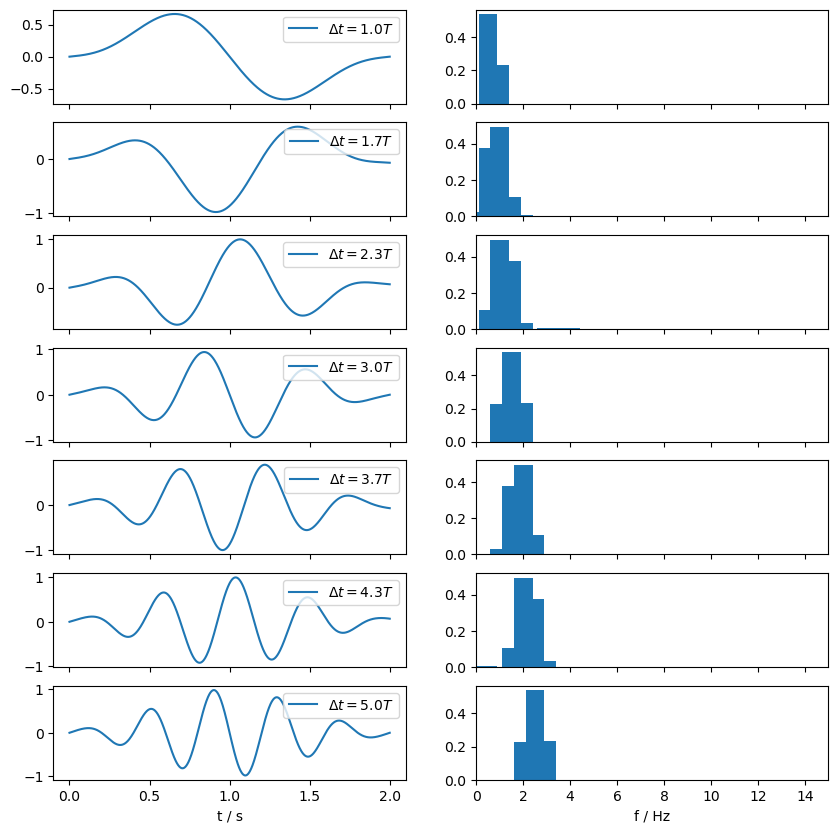

In [45]:
from scipy import signal

fig2, axs2 = plt.subplots(k, 2, sharex='col', figsize=(10,10))
window = signal.windows.hamming(N)
for i, n in enumerate(ns):
    f = n/ (np.max(ts))
    ys = np.sin(2 * np.pi * f * ts) * window
    axs2[i][0].plot(ts, ys, label=f'$\\Delta t = {n:.2} T$')


    yfft = fft(ys)
    yfft =  2.0 / N * np.abs(yfft[0:N//2])
    yfft[0] = yfft[0] / 2
    axs2[i][1].bar(fftfreq(N, d=dt)[0:N//2], yfft, )
    axs2[i][1].set(xlim=[0, 15])
    axs2[i][0].legend(loc=1)


axs2[-1][1].set(xlabel='f / Hz')
axs2[-1][0].set(xlabel='t / s')
fig.tight_layout()
fig.savefig('out/window')